In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import os

In [8]:
# === 1. Load CSV file ===
df = pd.read_csv("stats.csv")  # update filename if needed

In [4]:
# === 2. Compute averages ===
avg_vertices = df["num_vertices"].mean()
avg_faces = df["num_faces"].mean()
print(f"Average vertices: {avg_vertices:.2f}")
print(f"Average faces: {avg_faces:.2f}")


Average vertices: 5025.55
Average faces: 10691.53


In [5]:
# === 3. Detect outliers ===
std_vertices = df["num_vertices"].std()
std_faces = df["num_faces"].std()

outliers = df[
    (np.abs(df["num_vertices"] - avg_vertices) > 2*std_vertices) |
    (np.abs(df["num_faces"] - avg_faces) > 2*std_faces)
]
print("Outliers:")
print(outliers)

Outliers:
                                 file            class  num_vertices  \
16             data/Insect/D00430.obj           Insect         23399   
64             data/Insect/D00662.obj           Insect         22657   
65             data/Insect/D00884.obj           Insect         22663   
87               data/Tree/D00533.obj             Tree         31668   
92               data/Tree/D00479.obj             Tree         28407   
...                               ...              ...           ...   
2456     data/ClassicPiano/D00605.obj     ClassicPiano          8121   
2466  data/MilitaryVehicle/D00801.obj  MilitaryVehicle         34333   
2471  data/MilitaryVehicle/D00017.obj  MilitaryVehicle         27708   
2474  data/MilitaryVehicle/D00577.obj  MilitaryVehicle         25354   
2479  data/MilitaryVehicle/D00529.obj  MilitaryVehicle         38226   

      num_faces      face_types  \
16        46540  only triangles   
64        41626  only triangles   
65        41626  onl

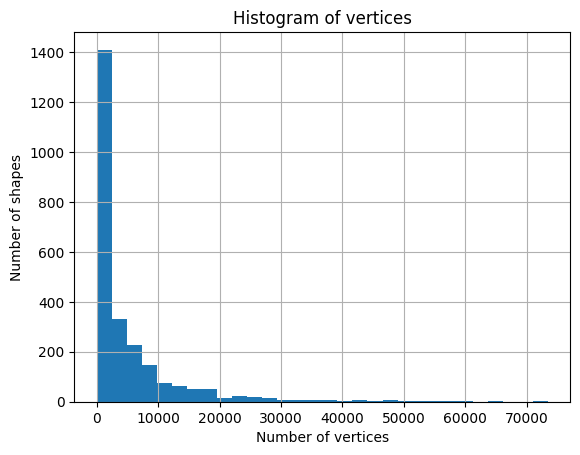

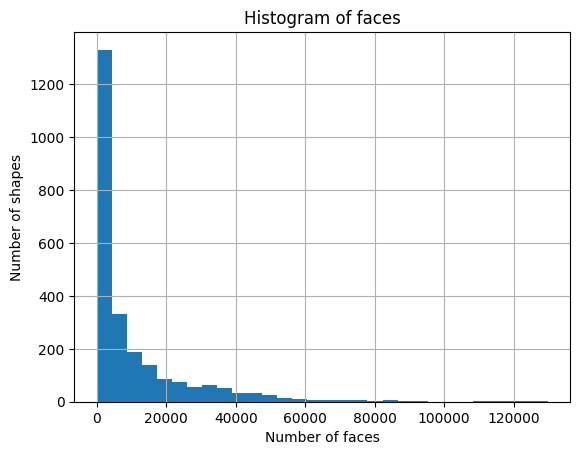

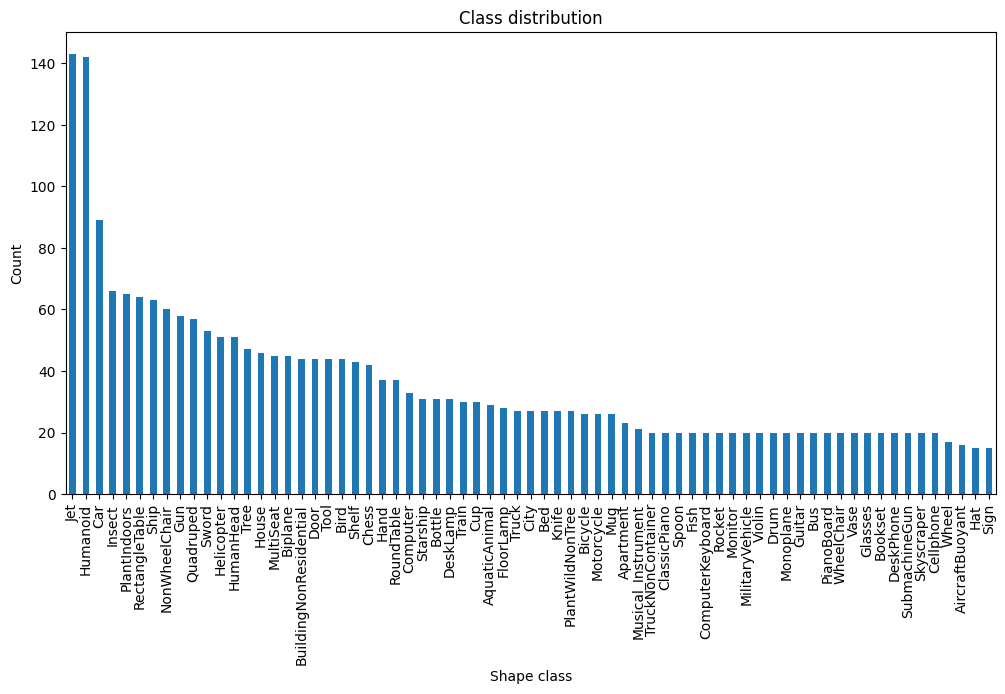

In [6]:
# === 4. Plot histograms ===
plt.figure()
df["num_vertices"].hist(bins=30)
plt.xlabel("Number of vertices")
plt.ylabel("Number of shapes")
plt.title("Histogram of vertices")
plt.show()

plt.figure()
df["num_faces"].hist(bins=30)
plt.xlabel("Number of faces")
plt.ylabel("Number of shapes")
plt.title("Histogram of faces")
plt.show()

plt.figure(figsize=(12,6))
df["class"].value_counts().plot(kind="bar")
plt.xlabel("Shape class")
plt.ylabel("Count")
plt.title("Class distribution")
plt.show()

In [12]:
# === 5. Average shape + outliers visualization ===
# Find the shape closest to the average
df["dist_to_avg"] = np.sqrt(
    (df["num_vertices"] - avg_vertices)**2 +
    (df["num_faces"] - avg_faces)**2
)
avg_shape_row = df.loc[df["dist_to_avg"].idxmin()]
avg_shape_path = avg_shape_row["file"]  # assuming "path" column in CSV

# Load and visualize with Open3D
mesh_avg = o3d.io.read_triangle_mesh(avg_shape_path)
mesh_avg.compute_vertex_normals()
print("Showing average shape...")
o3d.visualization.draw_geometries([mesh_avg])

# Outlier with fewest vertices
min_shape = df.loc[df["num_vertices"].idxmin()]

# Outlier with most vertices
max_shape = df.loc[df["num_vertices"].idxmax()]

for shape in [min_shape, max_shape]:
    mesh_out = o3d.io.read_triangle_mesh(shape["file"])
    mesh_out.compute_vertex_normals()
    print(f"Showing outlier: {shape['file']}")
    o3d.visualization.draw_geometries([mesh_out])



Showing average shape...
Showing outlier: data/Door/m1708.obj
Showing outlier: data/Skyscraper/D00058.obj
